In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
df = pd.read_csv('heart_failure.csv')

X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']

df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [3]:
dead = df[df['DEATH_EVENT']==1].sample(n=90)
alive = df[df['DEATH_EVENT']==0].sample(n=90)

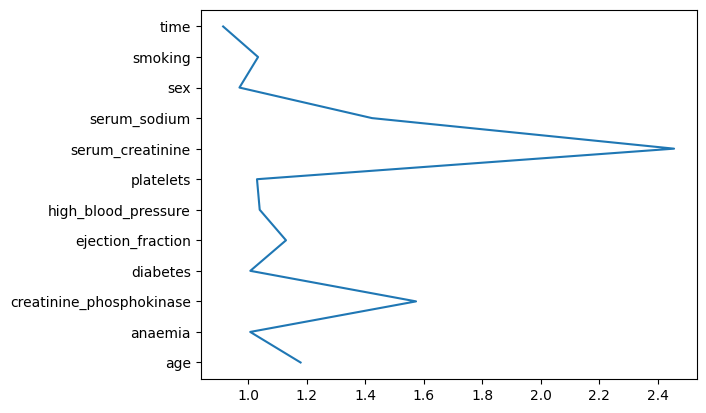

In [4]:
std_ratio = []
for x in df.columns:
        std_ratio.append(np.std(dead[x])/np.std(alive[x]))

std_ratio = std_ratio[:-1]
plt.plot(std_ratio, df.columns.drop('DEATH_EVENT'))

In [5]:
best_column_arg = np.argmax(std_ratio)
df.columns[best_column_arg]


'serum_creatinine'

In [6]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear', 'rbf', 'poly']} 

svc = SVC(max_iter=100000)

grid_search = GridSearchCV(svc, param_grid, cv=5)
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=SVC(max_iter=100000),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf', 'poly']})

In [26]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.6855932203389831


In [20]:
from sklearn.model_selection import KFold, cross_val_score

X_best = df[df.columns[best_column_arg]]
X_best = np.array(X_best)
X_best = X_best.reshape(-1, 1)

y = np.array(y)
y = y.reshape(-1, 1)

svc = SVC(C=1, gamma=0.0001, kernel='rbf')

cv = KFold(n_splits=5, shuffle=True)
scores = cross_val_score(svc, X_best, y, cv=cv)

# print(scores)
print("mean score: ", np.mean(scores))

mean score:  0.6789830508474576


In [21]:
mean_scores = []

for column in df.columns.drop('DEATH_EVENT'):
    X_temp = df[column]
    X_temp = np.array(X_temp)
    X_temp = X_temp.reshape(-1, 1)

    y = np.array(y)
    y = y.reshape(-1, 1)

    svc = SVC(C=0.1, gamma=0.0001, kernel='rbf')

    cv = KFold(n_splits=5, shuffle=True)
    scores = cross_val_score(svc, X_temp, y, cv=cv)
    print(f'mean score with {column}:', np.mean(scores))
    mean_scores.append(np.mean(scores))

mean score with age: 0.6789265536723164
mean score with anaemia: 0.6790395480225988
mean score with creatinine_phosphokinase: 0.67909604519774
mean score with diabetes: 0.6789830508474577
mean score with ejection_fraction: 0.6789265536723164
mean score with high_blood_pressure: 0.6789830508474577
mean score with platelets: 0.6788135593220338
mean score with serum_creatinine: 0.6789830508474577
mean score with serum_sodium: 0.6789265536723164
mean score with sex: 0.6789265536723164
mean score with smoking: 0.6792655367231638
mean score with time: 0.8229378531073447


<BarContainer object of 12 artists>

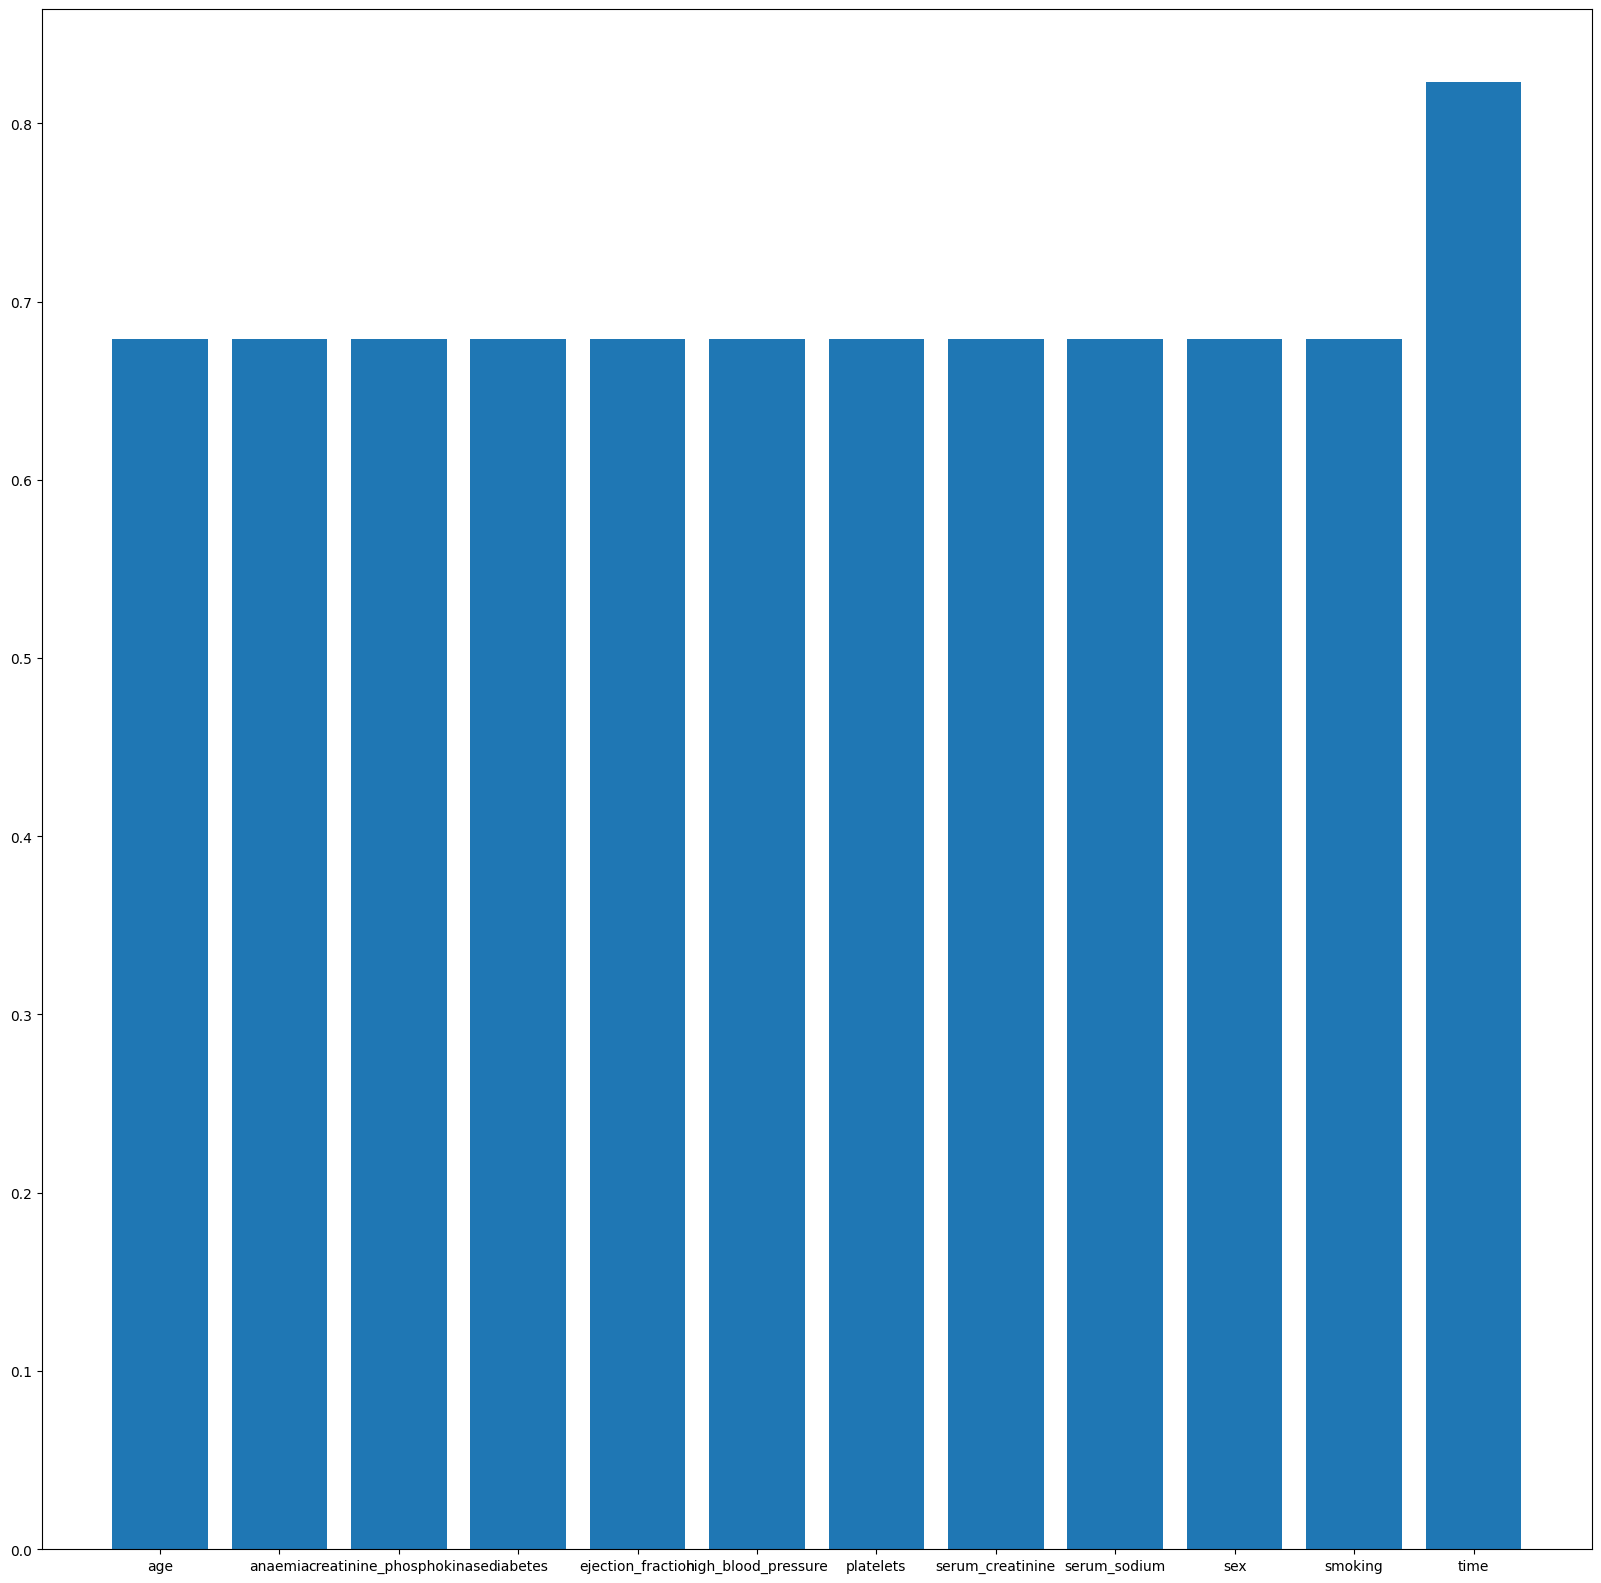

In [22]:
plt.figure(figsize=(20,20))
plt.bar(df.columns.drop('DEATH_EVENT'), mean_scores)

In [23]:
np.argmax(mean_scores)

11

In [24]:
X_time = X['time']

mean_scores = []

for column in df.columns.drop(['DEATH_EVENT', 'time']):
    X_new = df[column]
    X_con = X_time+X_new
    X_con = np.array(X_con)
    X_con = X_con.reshape(-1, 1)

    y = np.array(y)
    y = y.reshape(-1, 1)

    svc = SVC(C=0.1, gamma=0.0001, kernel='rbf')

    cv = KFold(n_splits=5, shuffle=True)
    scores = cross_val_score(svc, X_con, y, cv=cv)
    print(f'mean score with time and {column}:', np.mean(scores))
    mean_scores.append(np.mean(scores))

mean score with time and age: 0.8059887005649717
mean score with time and anaemia: 0.8262146892655368
mean score with time and creatinine_phosphokinase: 0.6790395480225988
mean score with time and diabetes: 0.8229378531073447
mean score with time and ejection_fraction: 0.8495480225988701
mean score with time and high_blood_pressure: 0.8193220338983049
mean score with time and platelets: 0.6791525423728814
mean score with time and serum_creatinine: 0.8260451977401129
mean score with time and serum_sodium: 0.8293220338983052
mean score with time and sex: 0.8328248587570621
mean score with time and smoking: 0.8229378531073447


<BarContainer object of 11 artists>

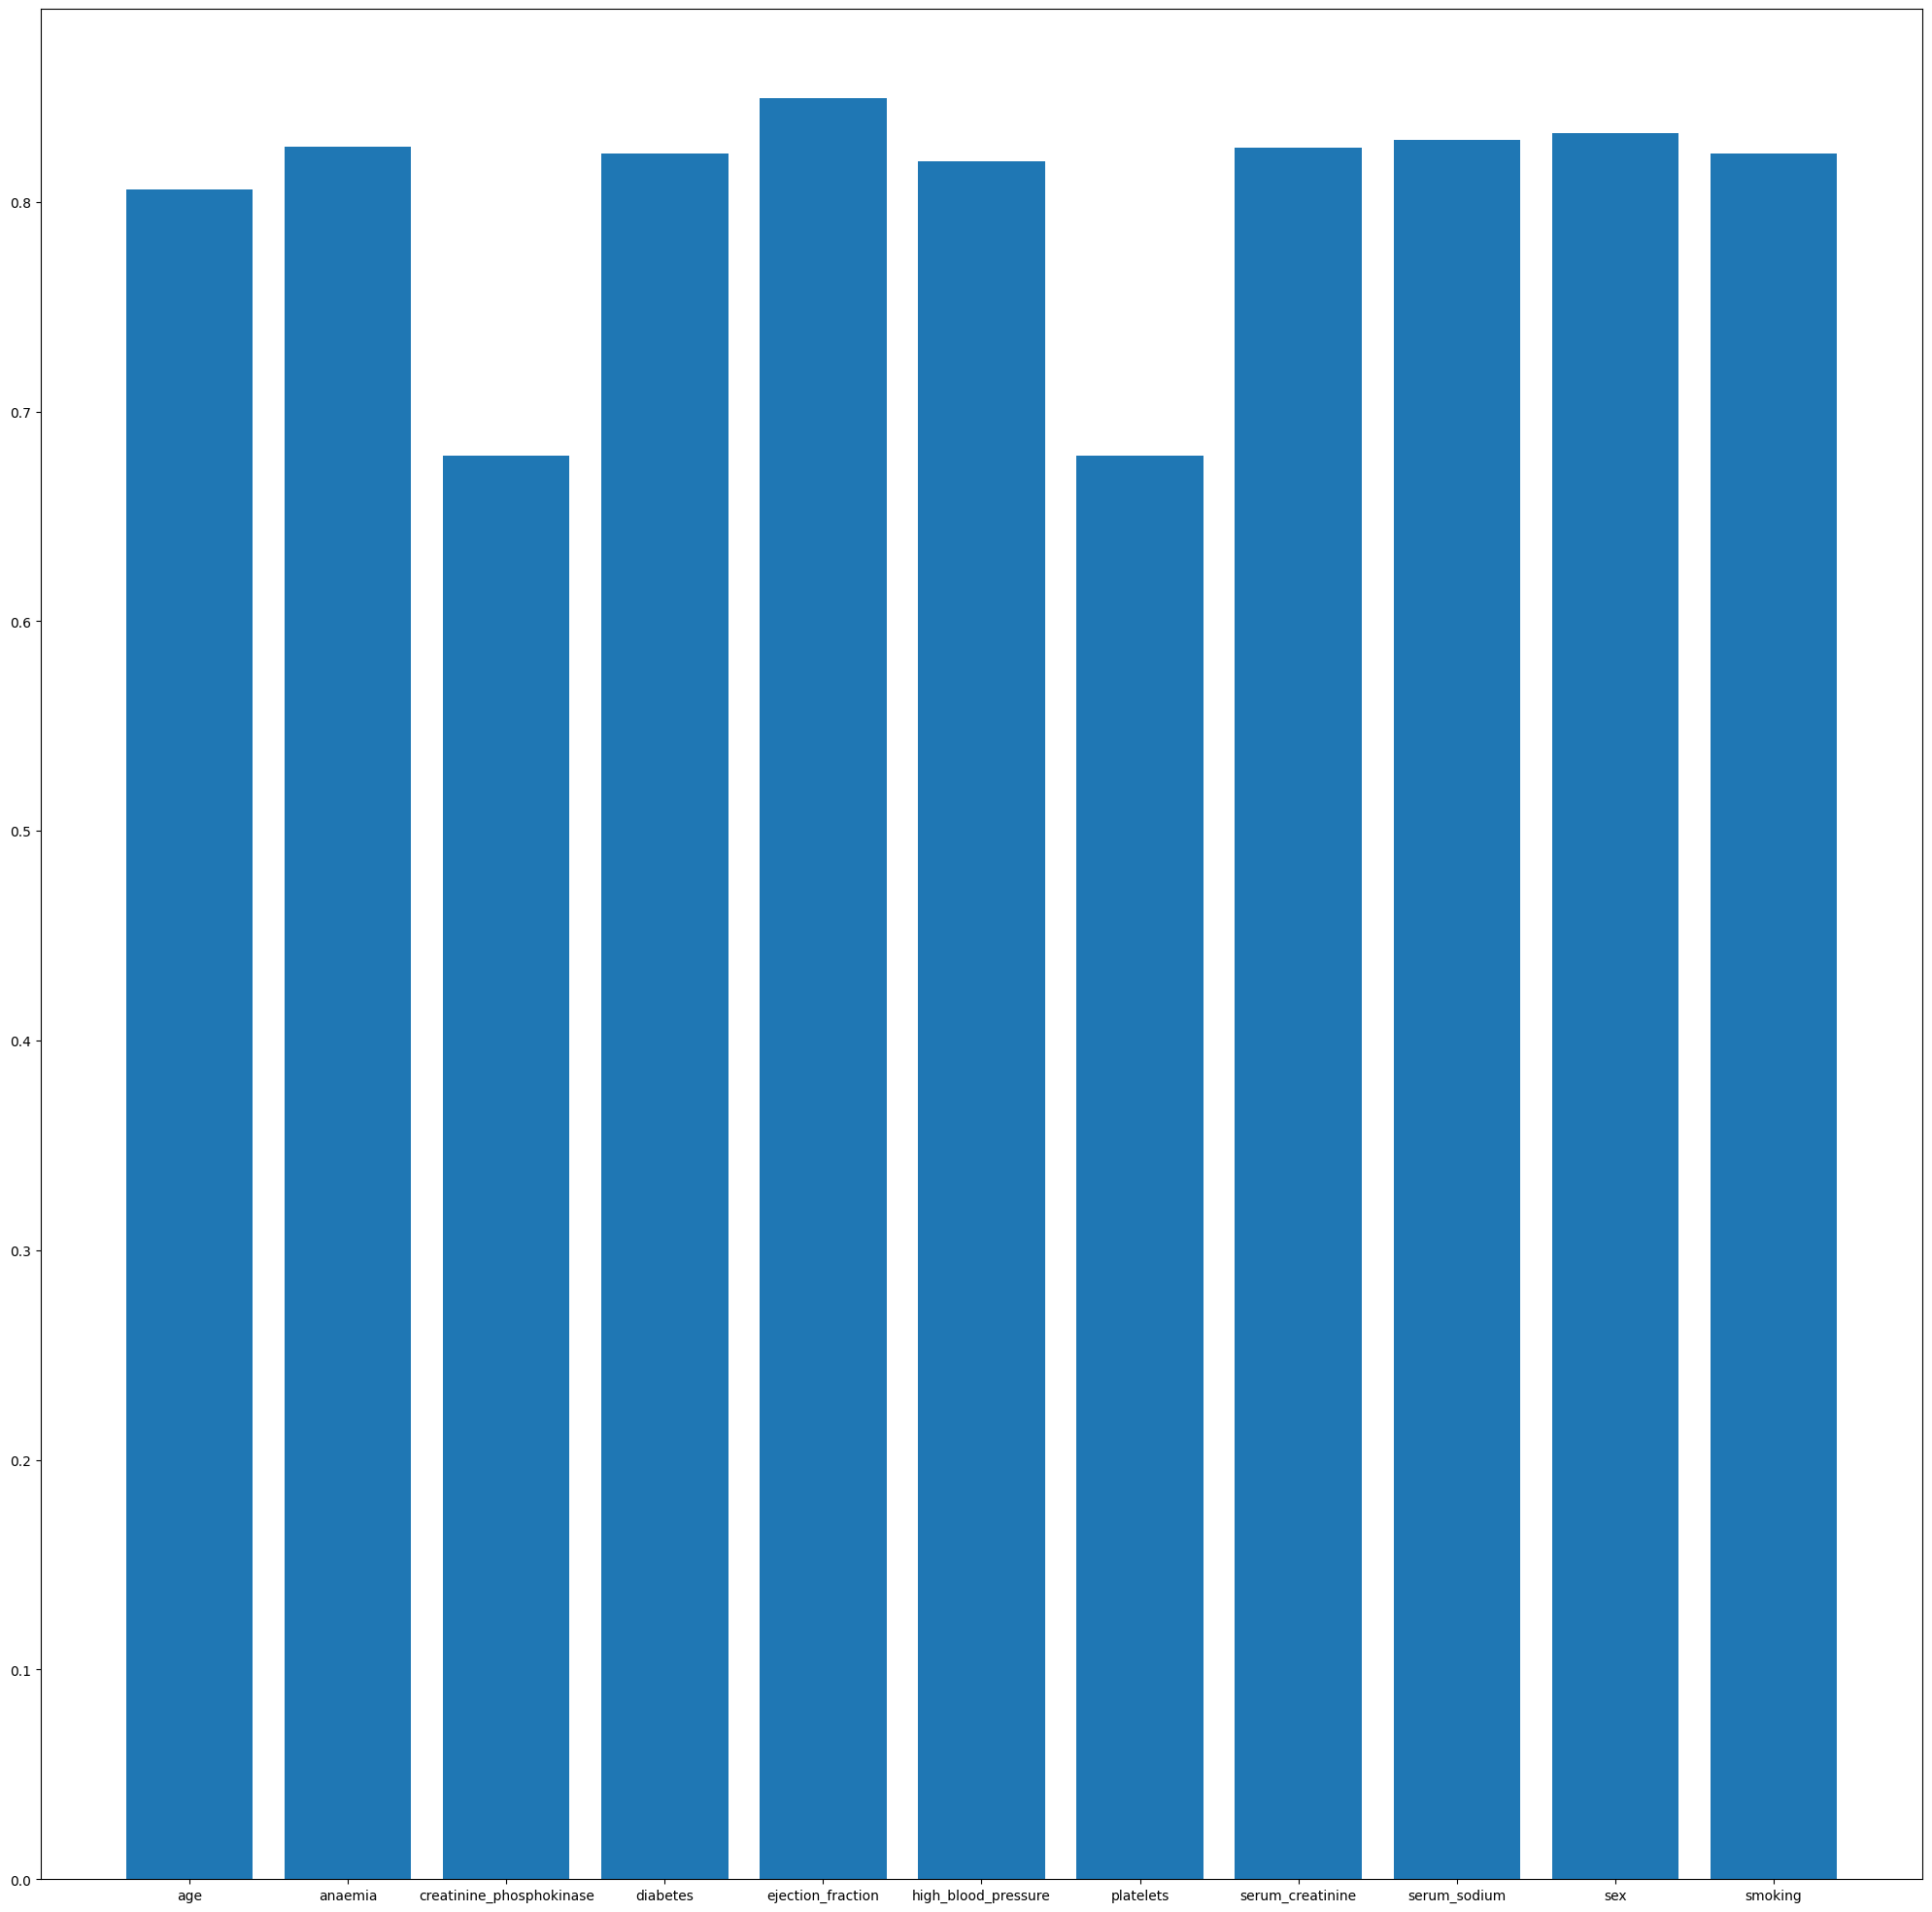

In [25]:
plt.figure(figsize=(25,25))
plt.bar(df.columns.drop(['DEATH_EVENT', 'time']), mean_scores)